In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np


from ssd import SSD
from ssd_utils import UnseenImagesGenerator, create_bbox_with_priors
from visual_util import render_above_threshold, render_top_n

import json

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['image.interpolation'] = 'nearest'
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

np.set_printoptions(suppress=True)

Using TensorFlow backend.


In [2]:
def gen_fix(path, unseen_gen):
    images, filenames = next(unseen_gen)
    old_filenames = filenames
    for i, fname in enumerate(old_filenames):
        filenames[i] = path + "/" + fname
    return images, filenames

In [3]:
# some constants
NUM_CLASSES = 20
weight_load_num_classes = 20
target_size = (512, 512)
batch_size = 4

weight_path = '/home/joakim/projects/CensorML/weights/VOCweights_512x512.hdf5'
unseen_path = 'pics'
with open('voc_labels.json', "r") as class_file:
    classes = json.load(class_file)

In [4]:
ssd = SSD(size=target_size, num_classes=weight_load_num_classes)
model = ssd.model
bbox_util = create_bbox_with_priors(model, NUM_CLASSES, target_size)

('old:', array([ 14.48154688,   7.24077344]))
('New:', array([ 0.04      ,  0.06324555,  0.05656854,  0.02828427], dtype=float32))
('old:', array([ 36.2038672 ,  44.34050067,  18.1019336 ,  14.78016689]))
('New:', array([ 0.1       ,  0.16124515,  0.14142136,  0.17320508,  0.07071068,
        0.05773503], dtype=float32))


ValueError: operands could not be broadcast together with shapes (32,16,8) (6,) (32,16,8) 

In [ ]:
ssd.model.load_weights(weight_path, by_name=True)

In [ ]:
unseen_gen = UnseenImagesGenerator(directory=unseen_path, target_size=target_size, dim_ordering="tf", shuffle=False, batch_size=batch_size)

In [ ]:
images, filenames = gen_fix(unseen_path, unseen_gen)

In [ ]:
preds = model.predict(images, batch_size=batch_size)
results = bbox_util.detection_out(preds)

In [ ]:
render_above_threshold(filenames, results, 0.5, classes)

In [ ]:
render_top_n(filenames, results, 3, classes, must_be_in_classes=["car", "person", "cat", "bicycle"])

In [1]:
from vis.visualization import visualize_activation, get_num_filters

Using TensorFlow backend.


In [2]:
from vis.utils import utils

In [3]:
filters = np.arange(get_num_filters(model.layers[1]))

NameError: name 'np' is not defined

In [14]:
vis_images = []
for idx in filters:
    img = visualize_activation(model, 1, filter_indices=idx) 
    img = utils.draw_text(img, str(idx))
    vis_images.append(img)

Working on filters: [0]
Working on filters: [1]
Working on filters: [2]
Working on filters: [3]
Working on filters: [4]
Working on filters: [5]
Working on filters: [6]
Working on filters: [7]
Working on filters: [8]
Working on filters: [9]
Working on filters: [10]
Working on filters: [11]
Working on filters: [12]
Working on filters: [13]
Working on filters: [14]
Working on filters: [15]
Working on filters: [16]
Working on filters: [17]
Working on filters: [18]
Working on filters: [19]
Working on filters: [20]
Working on filters: [21]
Working on filters: [22]
Working on filters: [23]
Working on filters: [24]
Working on filters: [25]
Working on filters: [26]
Working on filters: [27]
Working on filters: [28]
Working on filters: [29]
Working on filters: [30]
Working on filters: [31]
Working on filters: [32]
Working on filters: [33]
Working on filters: [34]
Working on filters: [35]
Working on filters: [36]
Working on filters: [37]
Working on filters: [38]
Working on filters: [39]
Working on

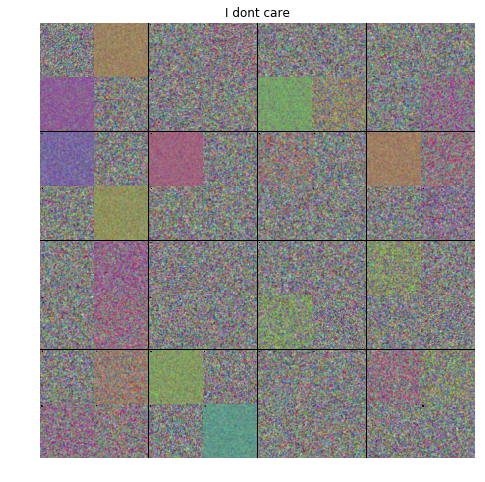

In [16]:
stitched = utils.stitch_images(vis_images, cols=8)    
plt.axis('off')
plt.imshow(stitched)
plt.title("I dont care")
plt.show()

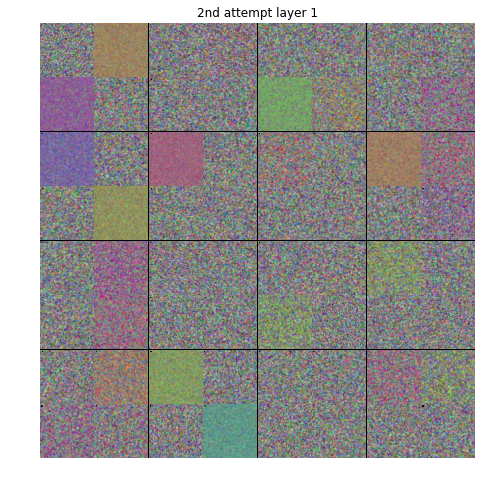

In [15]:
stitched = utils.stitch_images(vis_images, cols=8)    
plt.axis('off')
plt.imshow(stitched)
plt.title("2nd attempt layer 1")
plt.show()

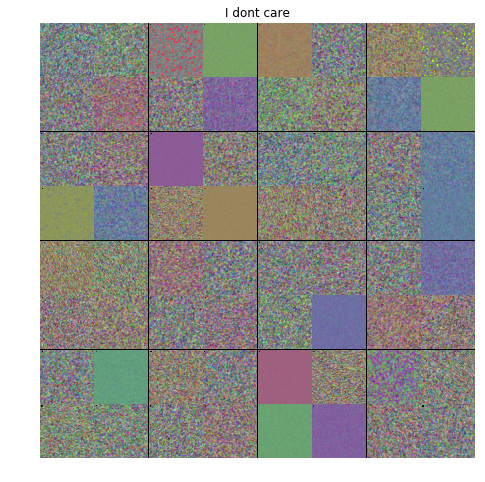

In [19]:
stitched = utils.stitch_images(vis_images, cols=8)    
plt.axis('off')
plt.imshow(stitched)
plt.title("I dont care")
plt.show()